# Plotting av TEM bildedata

Målet med denne Jupyter Notebooken er at dere skal bli litt kjent med HyperSpy, og hvordan dere kan både åpne og visualisere TEM data. Disse er vanligvis i DM3-formatet, hvor HyperSpy kan lese både dataen og metadataen.

Denne kunnskapen blir nyttig i neste Notebook, hvor dere skal prosessere mer avansert data: STEM - Differential Phase Constrast (DPC) og Scanning Electron Diffraction (SED). I tillegg skal HyperSpy sin spektroskopi-funksjonalitet brukes i neste øving, til å analysere data fram SEMen.

## Instruksjoner

Før dere begynner med denne Jupyter Notebooken er det viktig at dere har gått igjennom instruksjonene:

- Rigge opp "pyxem" environment, som har alle python pakkene dere trenger: `pyxem`, `hyperspy`, `hyperspy-gui-ipywidgets`, `hyperspy-gui-traitsui`, `ipympl` og `jupyterlab`
- Aktivere dette "pyxem" environment
- Ha dataene i samme mappe som Jupyter Notebookene

## Blackboard levering

Fra denne Jupyter Notebooken skal dere levere både bildefil og HTML-versjon av Jupyter Notebooken dere brukte til å lage bildefilen. HTML-filen må være i en ZIP-fil.

Eksempel på hvordan bildet kan se ut, med skala-indikator, "høy-kontrast" tekst, og litt annoteringer. Merk at dere skal ikke bruke akkurat de annoteringene: bildet er bare en indikator for hvordan denne typen figurer burde se ut.

<img src="bilder/eksempelbilde.jpg" width=300 height=300 />

Merk at dere skal OGSÅ levere bildefil og HTML-versjon av Jupyter Notebooken for enten STEM-DPC eller SED: se de andre Notebooken (05 og 06) for mer informasjon om dette.

## Importere plotte-bibliotek og `hyperspy`

Først må plotte-biblioteket defineres, med `%matplotlib qt`, eller `%matplotlib widget`. Jeg anbefaler `%matplotlib qt`. Av og til så virker den ikke, i dette tilfellet, bruk `widget`.

In [1]:
%matplotlib qt

Så importer `hyperspy.api` som `hs`.

Dere kan få en `WARNING:hyperspy_gui_...`. Denne kan ignoreres.

Hvis dere får feilmeldingen `ModuleNotFoundError: No module named 'hyperspy'`, så:

- Skru av JupyterLab (File - Shut Down)
- Anaconda Navigator: "Applications on", velg pyxem

Hvis du IKKE finner pyxem der, så gå igjennom "01_installasjon_i_anaconda_navigator.pdf"

In [2]:
import hyperspy.api as hs

## Åpne dataset

Dette gjøres via `hs.load`, som kan åpne en rekke dataformater, spesielt innenfor elektronmikroskopi. 

Velg en av datasettene deres som har filformat `.dm3`. Gjerne en av de som dere kan tenke å bruke i labrapporten deres.

Lag et objekt som heter `s`.

Tips: sjekk docstring for informasjon om hvordan `hs.load` virker.

In [3]:
s = hs.load('stem_20k_spot0.2nm_cameralength8cm_adf.dm3')

In [4]:
s2 = hs.load('stem_20k_spot0.2nm_cameralength8cm_df.dm3')

In [3]:
s3 = hs.load('stem_20k_spot0.2nm_cameralength40cm_adf.dm3')

In [4]:
s4 = hs.load('stem_20k_spot0.2nm_cameralength40cm_bf.dm3')

Dette lager et `Signal2D` objekt, som inneholder mange forskjellige funksjoner.

En av disse er en plotte-funksjon, som visualiserer dataene.

Bruk `plot` funksjonen, som er en del av `s` objektet. Hvis du har brukt `%matplotlib qt` så åpnes dette som et eget vindu, dette kommer ofte "bak" nettleseren denne Notebooken er i. Så hvis vinduet ikke blir synlig, prøv å minimer nettleseren.

Hvis du bruker `%matplotlib widget` så kommer plottet rett i notebooken.

In [7]:
s.plot()

In [5]:
#s2.plot()
s3.plot()
s4.plot()

Dette er et interaktivt plot. Merk at dataene er automatisk kalibrert, ved at det er en scalebar med enten nano eller mikrometer.

I tillegg kan kontrasten endres med kontrast editoren: trykk på bildet, og så trykk på `H` knappen. Merk at dette bare virker med `%matplotlib qt`. Hvis du må bruke `%matplotlib widget`, så kan dette endres med `s.plot(vmin=0, vmax=1000)`.

Dette endrer bare visualiseringen i plottet, ikke dataene. Her er dette bare for å vise funksjonalitetene, dere trenger ikke å gjøre noe spesielt med dette plottet.

## `Signal2D` strukturen

Denne måten å jobbe med data er veldig praktisk, siden funksjonene finnes i data-objektet (signalet). Selve dataene er en NumPy array.

Skriv `s.data`, og kjør cellen.

In [9]:
s.data

array([[1070199, 1161875, 1134908, ..., 1233102,  558936,  776422],
       [1050559,  929955, 1020668, ...,  785039,  888369,  876156],
       [ 961255, 1203681, 1111193, ...,  879209, 1010589,  783289],
       ...,
       [2912037, 2911990, 2911943, ..., 2912111, 2912291, 2912288],
       [2912222, 2912012, 2911978, ..., 2912188, 2912238, 2912257],
       [2912016, 2912171, 2912054, ..., 2912147, 2912187, 2912016]],
      dtype=uint32)

Her kan vi se alle tall-verdiene til dataene i plottet vi så tidligere.

Men dette er bare selve dataene, metadatanene sånn som kablibrering er i `s.axes_manager`. Prøv dette.

In [10]:
s.axes_manager

Signal axis name,size,offset,scale,units
x,1024,-0.0,0.007407985161989927,µm
y,1024,-0.0,0.007407985161989927,µm


Disse tallene er vanligvis riktige, men alltid sjekk at de ser rimlige ut! For "standard" moduser så pleier de å være greie, men f.eks. i STEM-DPC data så er det mest sannsylig feil. Den vanligste måten å sjekke disse kablibreringene, er via objekter med kjente størrelser. For eksempel størrelsen på "vinduene", eller hvis man har atomæroppløsning så kan man bruke atomgitteret.

Andre metadata finner dere i `s.metadata`. Finn ut hva akselerasjonsspenningen (beam energy) var, via `Acquisition_instrument` - `TEM` (Trykk på pilen)

In [11]:
s.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── acquisition_mode = STEM
│       ├── beam_current = 0.0
│       ├── beam_energy = 200.0
│       ├── camera_length = 80.0
│       ├── dwell_time = 2e-05
│       ├── magnification = 20000.0
│       └── microscope = 2100F
├── General
│   ├── authors = Emil Christiansen
│   ├── date = 2021-09-23
│   ├── original_filename = stem_20k_spot0.2nm_cameralength8cm_adf.dm3
│   ├── time = 17:47:17
│   └── title = stem_20k_spot0.2nm_cameralength8cm_adf
├── Sample
│   └── description = TEDPELLA673_500nmGrid
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = 0.0
    ├── binned = False
    ├── quantity = Intensity
    └── signal_type =

In [12]:
s2.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── acquisition_mode = STEM
│       ├── beam_current = 0.0
│       ├── beam_energy = 200.0
│       ├── camera_length = 80.0
│       ├── dwell_time = 2e-05
│       ├── magnification = 20000.0
│       └── microscope = 2100F
├── General
│   ├── authors = Emil Christiansen
│   ├── date = 2021-09-23
│   ├── original_filename = stem_20k_spot0.2nm_cameralength8cm_df.dm3
│   ├── time = 17:58:44
│   └── title = stem_20k_spot0.2nm_cameralength8cm_df
├── Sample
│   └── description = TEDPELLA673_500nmGrid
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = 0.0
    ├── binned = False
    ├── quantity = Intensity
    └── signal_type =

Her finner man informasjon om mikroskopet, sånn som akselerasjonspenning. Informasjon om prøven er ting man vanligvis må manuelt skrive inn, så denne informasjon er ganske ofte feil.

## Plotting av data

Laging av bildefiler er veldig likt som for FIB-bildene, men det er et par triks.

Først importer `matplotlib.pyplot` som `plt`, og lag en `fig` og `ax` via `plt.subplots`.

In [6]:
import matplotlib.pyplot as plt

In [13]:
fig, axarr = plt.subplots(2, 2, sharey=True)

In [7]:
f, ax = plt.subplots(1,2, sharey=True)

Deretter bruk `imshow` i `ax`, med `s.data` som bildedata, og `s.axes_manager.signal_extent` som `extent`.

In [8]:
ax0 = ax[0]
ax1 = ax[1]

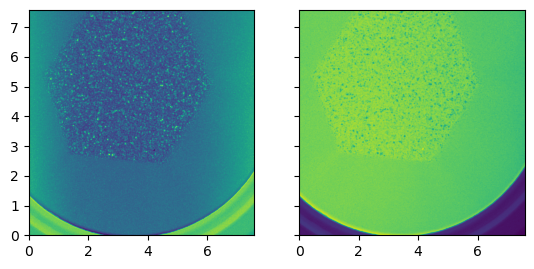

In [9]:
ax0.imshow(s3.data, extent=s3.axes_manager.signal_extent)
ax1.imshow(s4.data, extent=s4.axes_manager.signal_extent)
f

In [14]:
ax = axarr[0][0]
ax2 = axarr[1][0]
ax3 = axarr[0][1]
ax4 = axarr[1][1]

In [15]:
ax.imshow(s.data, extent=s.axes_manager.signal_extent)

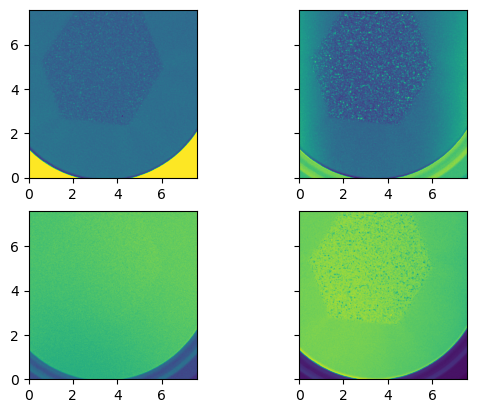

In [16]:
ax2.imshow(s2.data, extent=s2.axes_manager.signal_extent)
ax3.imshow(s3.data, extent=s3.axes_manager.signal_extent)
ax4.imshow(s4.data, extent=s4.axes_manager.signal_extent)
fig

Så kan man bruke akkurat de samme plotte-funksjonene som med FIB-dataene.

### Endre på kontrast: `clim`

Et vanlig problem i denne type data er store forskjeller i intensitet i bildet. Ergo at det er veldig lyse og veldig mørke området, som gjør det vanskelig å se detaljene man er interessert i.

En løsning på dette er å lagre `AxesImage` som en variabel (`cax = ax.imshow(.....)`, og bruke `set_clim` funksjonen i `cax`.

Tips
- Bruk `get_clim` for å se hva de automatiske verdiene er, og bruk disse som et utgangspunkt
- Sjekk docstring til `set_clim` for å se hvordan den virker (`Shift` + `Tab`)

In [17]:
cax = ax.imshow(s.data, extent=s.axes_manager.signal_extent)
cax2 = ax2.imshow(s2.data, extent=s2.axes_manager.signal_extent)
cax3 = ax3.imshow(s3.data, extent=s3.axes_manager.signal_extent)
cax4 = ax4.imshow(s4.data, extent=s4.axes_manager.signal_extent)

In [10]:
cax0 = ax0.imshow(s3.data, extent=s3.axes_manager.signal_extent)
cax1 = ax1.imshow(s4.data, extent=s4.axes_manager.signal_extent)

In [11]:
cax0.get_clim()

(13368, 705316)

In [12]:
cax1.get_clim()

(41432, 2780670)

In [20]:
cax3.get_clim()

(13368, 705316)

In [21]:
cax4.get_clim()

(41432, 2780670)

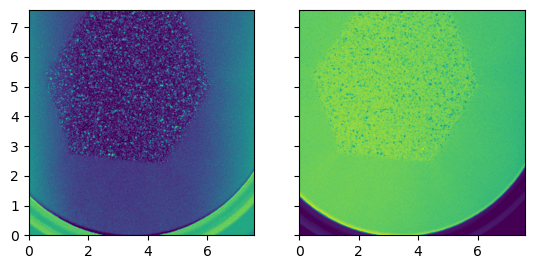

In [14]:
cax0.set_clim(vmin=153368, vmax=705316)
cax1.set_clim(vmin=250000, vmax=2780670)
f

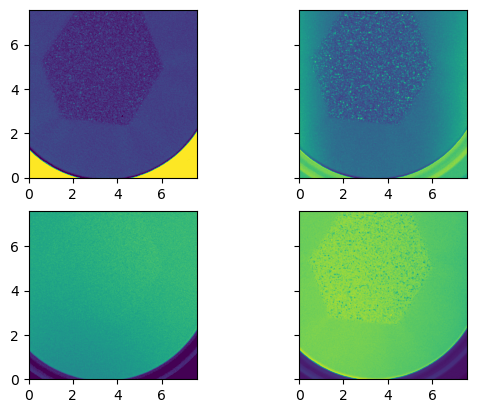

In [19]:
cax2.set_clim(vmin=1100000, vmax=2310746)
fig

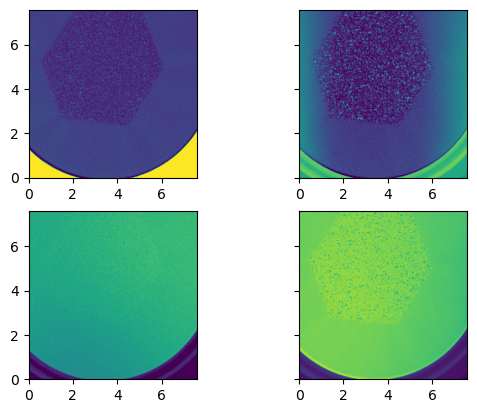

In [20]:
cax3.set_clim(vmin=153368, vmax=705316)
fig

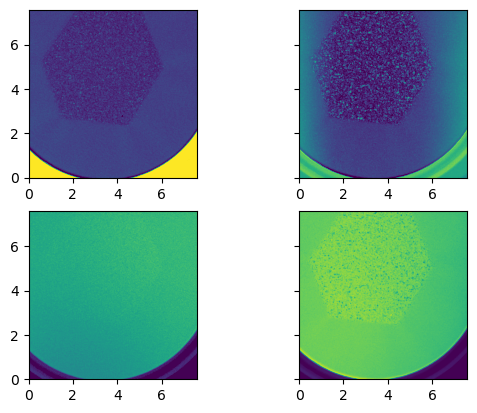

In [21]:
cax4.set_clim(vmin=250000, vmax=2780670)
fig

# TEM-data-figur

Bruk denne Notebooken i tillegg til kunnskapen og koden dere brukte i FIB-øvingen til å lage en bildefil med TEM-data, gjerne en dere tenker å bruke i labrapporten.

Denne skal ha samme "format" som FIB-bildet:

- Inneholde et eller flere bilder
- Ha scalebar
- Noen annoteringer

In [15]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import matplotlib.patheffects as patheffects
fontprops = fm.FontProperties(size=12)

In [17]:
scalebar_kwargs = {'size': 3, 'label': '3 um', 'loc': 4, 'frameon': False, 'color': 'white', 'size_vertical': 0.2, 'label_top': False, 'fontproperties': fontprops}
scalebar0 = AnchoredSizeBar(transform=ax0.transData, **scalebar_kwargs)
# Denne legger til et svart omriss rundt scalebar teksten, for å gjøre den lettere å lese
scalebar0.txt_label._text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='black', capstyle="round")])
ax0.add_artist(scalebar0)

scalebar2 = AnchoredSizeBar(transform=ax1.transData, **scalebar_kwargs)
# Denne legger til et svart omriss rundt scalebar teksten, for å gjøre den lettere å lese
scalebar2.txt_label._text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='black', capstyle="round")])
ax1.add_artist(scalebar2)

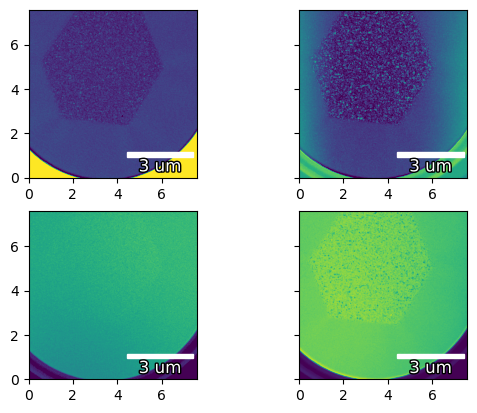

In [24]:
scalebar2 = AnchoredSizeBar(transform=ax2.transData, **scalebar_kwargs)
# Denne legger til et svart omriss rundt scalebar teksten, for å gjøre den lettere å lese
scalebar2.txt_label._text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='black', capstyle="round")])
ax2.add_artist(scalebar2)

scalebar3 = AnchoredSizeBar(transform=ax3.transData, **scalebar_kwargs)
# Denne legger til et svart omriss rundt scalebar teksten, for å gjøre den lettere å lese
scalebar3.txt_label._text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='black', capstyle="round")])
ax3.add_artist(scalebar3)

scalebar4 = AnchoredSizeBar(transform=ax4.transData, **scalebar_kwargs)
# Denne legger til et svart omriss rundt scalebar teksten, for å gjøre den lettere å lese
scalebar4.txt_label._text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='black', capstyle="round")])
ax4.add_artist(scalebar4)

fig

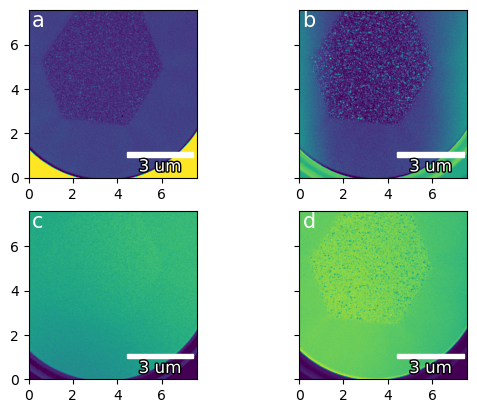

In [25]:
ax.annotate('a', (0.02, 0.90), xycoords='axes fraction', color='white', fontsize=15)
ax2.annotate('c', (0.02, 0.90), xycoords='axes fraction', color='white', fontsize=15)
ax3.annotate('b', (0.02, 0.90), xycoords='axes fraction', color='white', fontsize=15)
ax4.annotate('d', (0.02, 0.90), xycoords='axes fraction', color='white', fontsize=15)
fig

In [26]:
ax.set_xticks([])
ax.set_yticks([])

ax2.set_xticks([])
ax2.set_yticks([])

ax3.set_xticks([])
ax3.set_yticks([])

ax4.set_xticks([])
ax4.set_yticks([])

[]

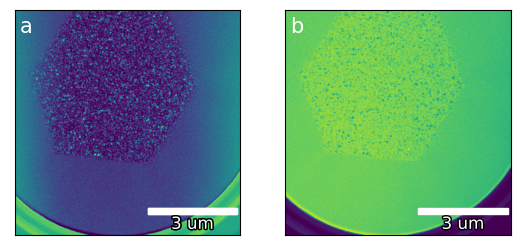

In [18]:
ax0.annotate('a', (0.02, 0.90), xycoords='axes fraction', color='white', fontsize=15)
ax1.annotate('b', (0.02, 0.90), xycoords='axes fraction', color='white', fontsize=15)

ax0.set_xticks([])
ax0.set_yticks([])

ax1.set_xticks([])
ax1.set_yticks([])
f

In [19]:
f.savefig("adf_og_df.jpg", dpi=300)

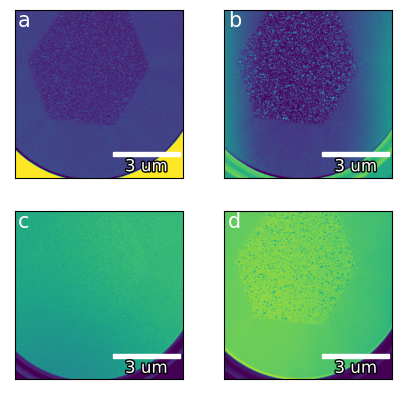

In [27]:
fig.subplots_adjust(left=0.2, bottom= None, right=0.8, top=None, wspace=None, hspace=None)
fig

In [28]:
fig.savefig("adf_og_df.jpg", dpi=300)

# Neste Jupyter Notebook: STEM-DPC eller SED

Nå som dere kan basisen om hvordan HyperSpy virker, så fortsett med enten `..._STEM_DPC...` eller `..._scanning_electron_diffraction_...` notebooken. Dere skal bare levere en av disse på blackboard, men hvis dere har begge datatypene fra TEM-laben så anbefaler jeg å gå igjennom begge.